# Global Network of Isotopes in Precipitation


A Jupyter notebook which features a new module called GNIP for visualising the data from such the GNIP network, and calculating precipitation weighted regression lines (Local Meteoric Waterlines).

https://nucleus.iaea.org/wiser/index.aspx

In [1]:
cd ..

/Users/AchilleTalon/Documents/GitHub/ice-in-caves


In [2]:
import lib.GNIP as gnip
import lib.isotopes as iso

In [3]:
austria = gnip.csv_read("../dat/wiser_bulkdata_at.csv")

In [4]:
slov = gnip.csv_read("../dat/wiser_bulkdata_slo.csv")

In [5]:
germany = gnip.csv_read("../dat/wiser_bulkdata_de.csv")

In [6]:
hundsalm = iso.read_excel("../dat/samples_iso_hundsalm_30_07_2019.xlsx")

In [7]:
hundsalm.loc[-999]

,column height (cm),s.d. height,d18O,s.d. d18O,d2H,s.d. d2H
protocol,,,,,,
DRIP,-999,-999,-11.829109,0.039187,-83.221898,0.276432
DRIP,-999,-999,-12.828781,0.047013,-90.332577,0.319610
DRIP,-999,-999,-13.813208,0.012394,-97.247515,0.197609
DRIP,-999,-999,-12.770700,0.016905,-89.963584,0.061779
DRIP,-999,-999,-12.670406,0.033090,-89.011659,0.345239
DRIP,-999,-999,-12.872294,0.039254,-90.729505,0.048862
ICICLE,-999,-999,-10.260000,0.070000,-71.870000,0.290000
ICICLE,-999,-999,-10.250000,0.080000,-72.200000,0.160000
ICICLE,-999,-999,-9.980000,0.030000,-69.150000,0.200000


In [8]:
#gnip.PWLSR(germany,"GARMISCH-PARTENKIRCHEN")

In [9]:
#gnip.PWLSR(austria,"VILLACHER ALPE")

In [10]:
#gnip.PWLSR(austria,"VIENNA (HOHE WARTE)")

In [11]:
#gnip.PWLSR(austria,"GRAZ (UNIVERSITAET)")

In [12]:
#gnip.PWLSR(slov,"LJUBLJANA")

In [13]:
#gnip.weighted_avg(austria,'GRAZ (UNIVERSITAET)','O18','Precipitation').plot()

In [14]:
#gnip.period_boxplot(austria,'GRAZ (UNIVERSITAET)','../fig/GNIP/graz_universitaet_boxplot_monthly.pdf',freq='m')

In [15]:
#gnip.LMWL_plotter(austria,'GRAZ (UNIVERSITAET)',filename="../fig/GNIP/graz_universitaet_LWML.pdf")

In [16]:
#gnip.LMWL_plotter(germany,'GARMISCH-PARTENKIRCHEN',filename="../fig/GNIP/garmisch_partenkirchen_LMWL.pdf",plot_title="Garmisch-Partenkirchen")

In [17]:
#gnip.period_boxplot(germany,'GARMISCH-PARTENKIRCHEN',
         #           filename="../fig/GNIP/garmisch_partenkirchen_monthly.pdf",
        #            freq='m')

In [18]:
#gnip.period_boxplot(slov,'LJUBLJANA',
      #              filename="../fig/GNIP/ljubljana_monthly.pdf",
    #                freq='m')

In [19]:
#gnip.LMWL_plotter(slov,'LJUBLJANA',
 #                 filename="../fig/GNIP/ljubljana_LMWL.pdf",
 #                plot_title="Ljubljana")

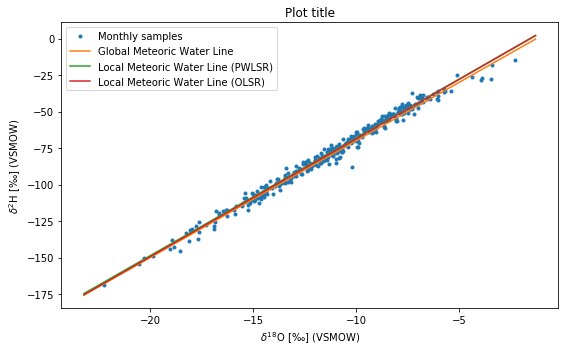

In [20]:
gnip.LMWL_plotter(austria,'VILLACHER ALPE',
                  filename="../fig/GNIP/villacher_alpe_LWML.pdf")

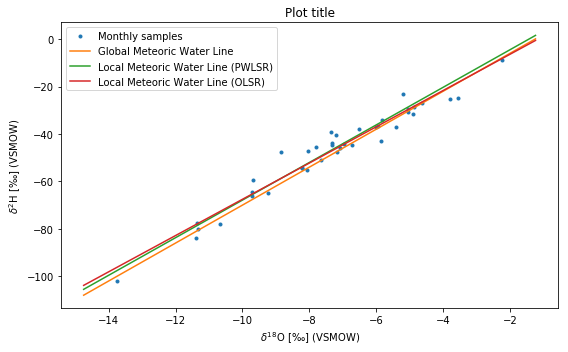

In [21]:
gnip.LMWL_plotter(slov,'KOZINA',filename="../fig/GNIP/kozina_LWML.pdf")

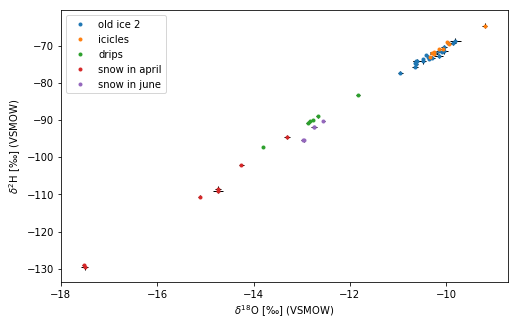

In [22]:
iso.crossPlotter(hundsalm,{'old ice 2':2,
                           'icicles':(-999,'ICICLE'),
                           'drips':(-999,'DRIP'),
                           'snow in april':3,
                           'snow in june':4},
                 filename="../fig/isotopes/iso_samples_Hundsalm_full.pdf")

In [23]:
#iso.crossPlotter(hundsalm,{'old ice 1':1,
  #                         'old ice 2':2},
   #              filename="../fig/isotopes/ice_transect_Hundsalm.pdf")

In [24]:
#iso.crossPlotter(hundsalm,{'snow transect (April)':3,
               #            'snow transect (June)':4},
              #   filename="../fig/isotopes/snow_transect_Hundsalm.pdf")

In [25]:
#iso.crossPlotter(hundsalm,{'drips (June)':(-999,'DRIP'),
                 #          'icicles (April and June)':(-999,'ICICLE')},
              #   filename="../fig/isotopes/icicles_drips_transect_Hundsalm.pdf")

In [26]:
migovec = iso.read_excel("../dat/samples_iso_migovec_30_07_2019.xlsx")

In [27]:
#iso.crossPlotter(migovec,{'ice transect':1,
         #                 'drip water':(-999,"DRIP"),
         #                 'congelation ice':(-999,"ICE")},
         #        filename="../fig/isotopes/snow_ice_Migovec.pdf")

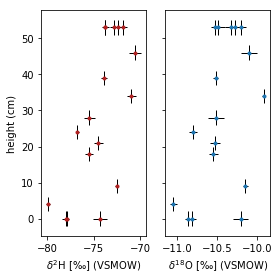

In [28]:
iso.transectPlotter(hundsalm,{"old ice":1},filename="../fig/isotopes/transect_1.pdf")

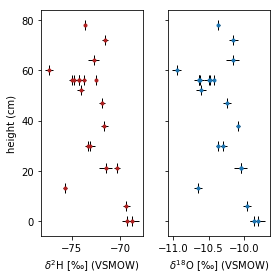

In [29]:
iso.transectPlotter(hundsalm,{"old ice":2},filename="../fig/isotopes/transect_2.pdf")